In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv("/Users/oscarcortes/Downloads/samsung.csv", sep=",")

In [3]:
# Seleccionar las columnas relevantes (Fecha, Cierre, Volumen)
selected_columns = ["Date", "Close", "Volume"]
df = data[selected_columns]

In [4]:
# Convertir la columna Date en formato de fecha
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [11]:
# Normalizar los datos
scaler = StandardScaler()
df[["Close", "Volume"]] = scaler.fit_transform(df[["Close", "Volume"]])
X_scaled = scaler.fit_transform(df[["Close", "Volume"]])

In [6]:
# Aplicar K-Means
num_clusters = 3  # Puedes ajustar este número según los resultados del análisis
kmeans = KMeans(n_clusters=num_clusters)
df["Cluster"] = kmeans.fit_predict(df[["Close", "Volume"]])

/Users/oscarcortes/uteq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


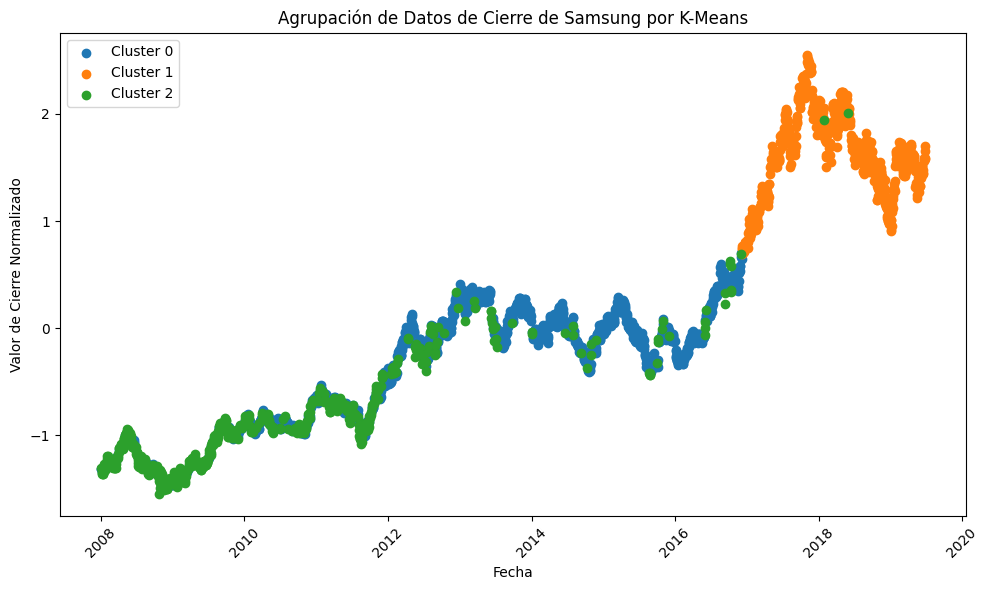

In [7]:
# Visualización de los clústeres
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = df[df["Cluster"] == cluster_id]
    plt.scatter(cluster_data["Date"], cluster_data["Close"], label=f"Cluster {cluster_id}")
plt.xlabel("Fecha")
plt.ylabel("Valor de Cierre Normalizado")
plt.title("Agrupación de Datos de Cierre de Samsung por K-Means")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Informe
print("Centroides de Clústeres:")
print(kmeans.cluster_centers_)

Centroides de Clústeres:
[[-0.24360041 -0.38313089]
 [-0.96498584  1.47972552]
 [ 1.60323879 -0.5144436 ]]


In [16]:
# Guardar el DataFrame con la columna de clústeres en un archivo CSV
df.to_csv("samsung_clusters.csv", index=False)

In [12]:
from sklearn.metrics import silhouette_score

# Rango de valores de num_clusters que vamos a probar
num_clusters_range = range(2, 11)

# Lista para almacenar los valores de las métricas
wcss_scores = []
silhouette_scores = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # Calcular el valor del WCSS
    wcss_scores.append(kmeans.inertia_)
    
    # Calcular el valor de la silueta promedio
    silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
    silhouette_scores.append(silhouette_avg)


/Users/oscarcortes/uteq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/oscarcortes/uteq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/oscarcortes/uteq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/oscarcortes/uteq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/oscarcortes/u

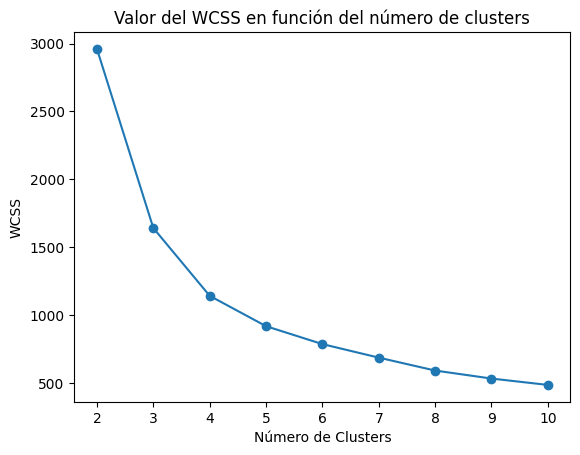

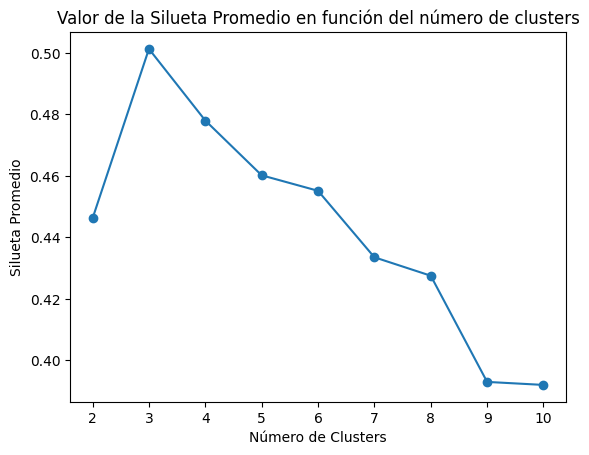

In [13]:
# Visualizar los resultados del WCSS
plt.plot(num_clusters_range, wcss_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Valor del WCSS en función del número de clusters')
plt.show()

# Visualizar los resultados de la silueta promedio
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silueta Promedio')
plt.title('Valor de la Silueta Promedio en función del número de clusters')
plt.show()
